<a href="https://colab.research.google.com/github/thanhdangg/Image_Search/blob/main/Image_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'flickr-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F31296%2F39911%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240831%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240831T023421Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D75f9d883b6ec2b508c8f2857564e2d264f31886c3edceb89042d9a3ff4ef9a1d9a1eaf814269e504b25b289a2a8dccb36e833f0dc0cbd598b60f9c68303c17635ce2c6a01f49906cc0526f76eee586a19ce0bd17f4babf6435e4342f5fbe739b8b1b6c6382c0c81ac57a911bb0deaa4466f4a29789da9f2e83b820459ba044c486a36bc3e746b9cb844a4140ae7bac6f1d8faaf936db2717dd61e6e4010b6db13f3109e7294faf8f296784c48c0463ffb204c46a77d8d7c71ff622c1eb14dda6e6e833a3f51cc21f3714abf92d22ebefc8e29c7c1ef98b1b746f5e55870bfcd20c76e35a0dd77a094ed009d79fe28602dcb288779554889059201c03ce97e4c8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 8765396518 bytes downloaded
Downloaded and uncompressed: flickr-image-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/2926786902.jpg
/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/575636303.jpg
/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/3507045406.jpg
/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/2570365455.jpg
/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/3480126681.jpg
/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/2551602773.jpg
/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/3103185190.jpg
/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/3064097919.jpg
/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/4479254009.jpg
/kaggle/input/flickr-image-dataset/

In [3]:
!pip install sentence-transformers
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 5.7 MB/s eta 0:00:00


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import faiss
from sentence_transformers import SentenceTransformer
import random

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


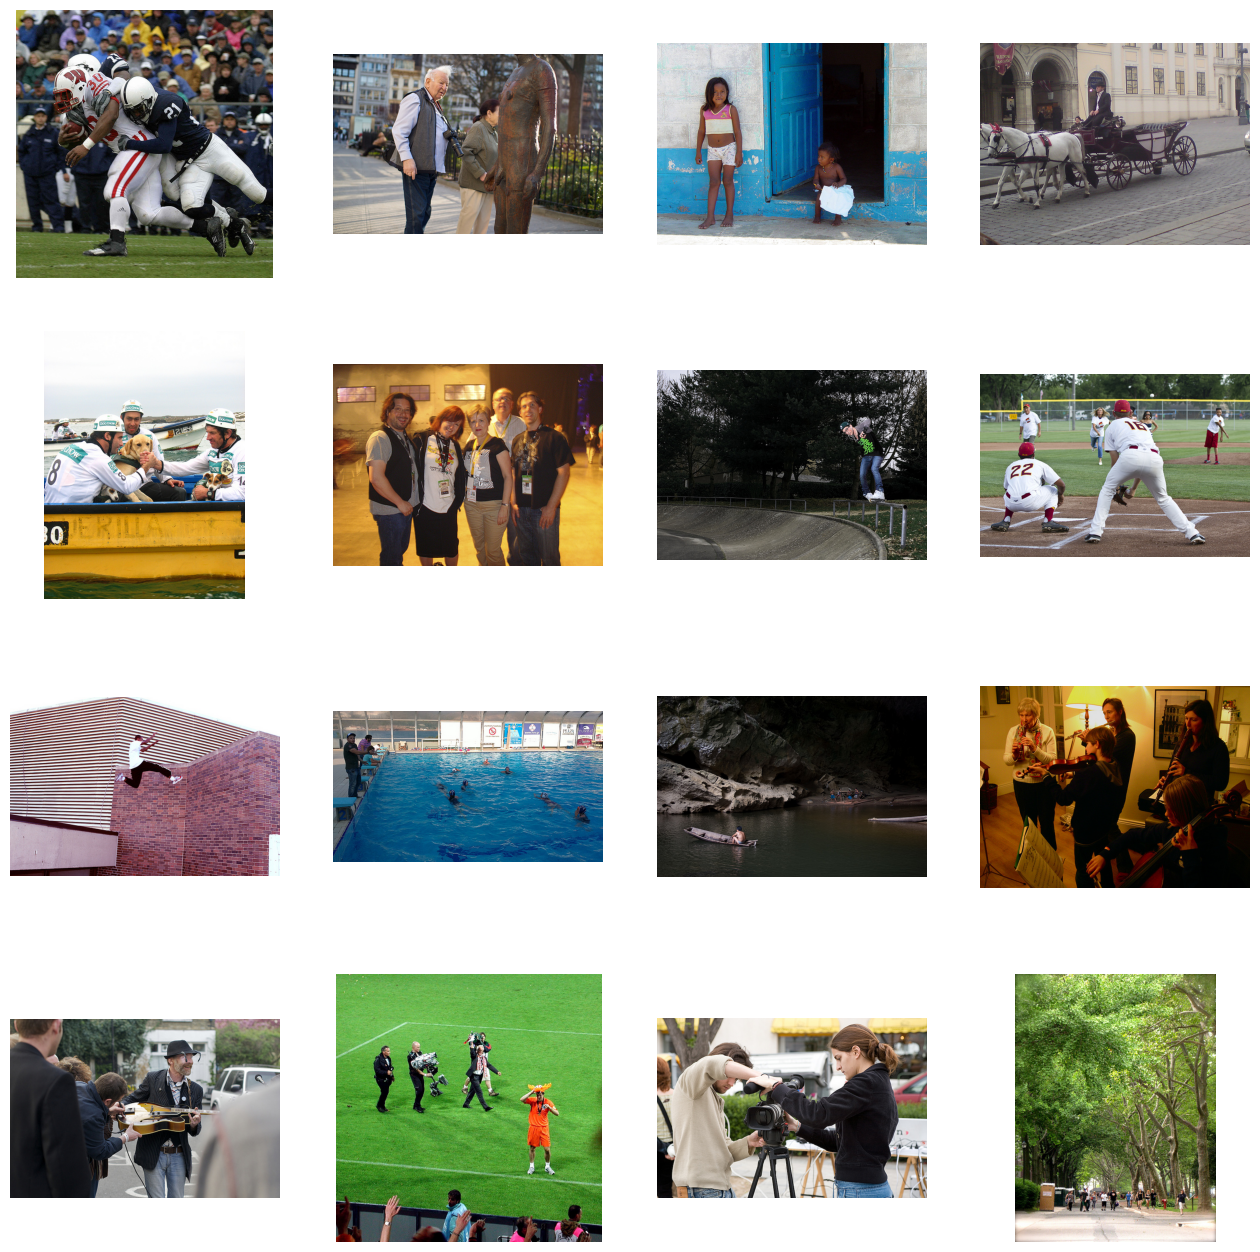

In [5]:

import matplotlib.pyplot as plt
import os
import random

image_dir = '/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images'

# Lấy danh sách các file ảnh
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Chọn ngẫu nhiên 16 ảnh
random_images = random.sample(image_files, 16)

plt.figure(figsize=(16, 16))
for i in range(16):
  img_path = os.path.join(image_dir, random_images[i])
  img = plt.imread(img_path)
  plt.subplot(4, 4, i+1)
  plt.imshow(img)
  plt.axis('off')
plt.show()


In [9]:
model = SentenceTransformer('clip-ViT-B-32')
image_path = '/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images'



In [10]:
import glob

In [11]:
image_files = glob.glob(os.path.join(image_path, '*.jpg'))
image_embeddings = model.encode(image_files, convert_to_tensor=True, show_progress_bar=True)


Batches:   0%|          | 0/994 [00:00<?, ?it/s]

In [12]:
dimension = image_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)

In [13]:
index = faiss.IndexIDMap(index)
index

<faiss.swigfaiss.IndexIDMap; proxy of <Swig Object of type 'faiss::IndexIDMapTemplate< faiss::Index > *' at 0x788bc7dd7510> >

In [14]:
vector = np.array(image_embeddings).astype('float32')
index.add_with_ids(vector, np.array(range(0, len(image_embeddings))))

In [15]:
faiss.write_index(index, 'index.faiss')

In [16]:
with open('image_files.txt', 'w') as f:
    for image_file in image_files:
        f.write(image_file + '\n')

In [24]:
def search_image(query, model, index, image_files, top_k=5):
    if query.endswith('.jpg'):
        query_image = Image.open(query)

    query_embedding = model.encode(query)
    query_embedding = query_embedding.astype('float32').reshape(1, -1)

    # FAISS search only returns two values: distances and indices
    distances, indices = index.search(query_embedding, top_k)

    retrieved_images = [image_files[i] for i in indices[0]]
    return query, retrieved_images


In [20]:
def visualize_result(query, retrived_images):
  plt.figure(figsize=(10, 10))
  if isinstance(query, Image.Image):
    plt.subplot(1, len(retrived_images)+1, 1)
    plt.imshow(query)
    plt.title("Query Image")
    plt.axis('off')
    start_idx = 1 if isinstance(query, Image.Image) else 0
  else:
    plt.subplot(1, len(retrived_images)+1, 1)
    plt.text(0.5, 0.5, query, ha='center', va='center', fontsize=16)
    plt.title("Query Text")
    plt.axis('off')
    start_idx = 2

  for i in range(len(retrived_images)):
    img_path = retrived_images[i]
    img = plt.imread(img_path)
    plt.subplot(1, len(retrived_images), i+1)
    plt.imshow(img)
    plt.axis('off')
  plt.show()


In [27]:
query = "a man"
query, retrived_images = search_image(query, model, index, image_files, top_k=5)


<ipython-input-20-38a877e83f67>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(retrived_images), i+1)


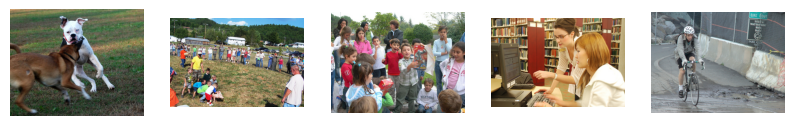

In [28]:
visualize_result(query, retrived_images)
